# .Business understanding

Aircraft vary widely in their safety records depending on manufacturer, model, maintenance history, usage, and geography.While modern aircraft are statistically very safe, historical data shows that certain models and types have accidents rates often linked to operational environment, mechanical complexities or outdated systems. a good safety record of an airline is critical towards its operational market, survival, reputation, prestige and most importantly passengers confidence towards its service offered. 

The company being new to aircraft enterprise, lacks experience in aircraft risk assessment. its therefore important to determine which aircraft has lowest risks for the organization to makes decisions on which aircraft to purchase. 

## .Business problem
The organization is expanding into the aviation industry and seeks to identify aircrafts with low-risks in order to proceed with purchase and starts its operations. the goal is to ensure safety and purchasing a reliable aircraft for commercial and private use.
### .Objectives and business questions
1) To identify  the safest aircrafts make/models

2) To evaluate aircraft safety Risks based on purpose of flight

3) To analyze regional operational risks 
 

## .Metric of success
The success of the business depends on evidence-based recommendations on low risk aircraft before initial purchase. insights must be actionable, understandable to non-technical leadership and can be used in procurement process.




# .Data understanding 
The data to be used in this analysis is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

## Loading dataset and getting the information

In [160]:
# importing necessary libraries to be used
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# reading and loading the dataset
aviation_data = pd.read_csv("data\AviationData.csv", encoding = "latin1")
aviation_data.head()

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
aviation_data.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [4]:
aviation_data.sample(5, random_state= 4)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
38221,20001207X04511,Accident,LAX95FA321,1995-09-02,"PHOENIX, AZ",United States,NaN,NaN,DVT,PHOENIX DEER VALLEY MUNI,...,Personal,NaN,2.0,0.0,0.0,0.0,VMC,Approach,Probable Cause,04-02-1997
33359,20001211X12901,Accident,DEN93LA088,1993-07-27,"MEEKER, CO",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,1.0,0.0,VMC,Maneuvering,Probable Cause,13-09-1994
65184,20080820X01268,Accident,CHI08WA258,2008-08-17,"Covington, United Kingdom",United Kingdom,NaN,NaN,NaN,NaN,...,Unknown,Reconnaissance Ventures Ltd,5.0,0.0,0.0,0.0,NaN,NaN,NaN,25-09-2020
82316,20180915X11112,Accident,WPR18LA262,2018-09-15,"St. Johns, AZ",United States,343049N,1092213W,SJN,St Johns Industrial Airport,...,Personal,NaN,0.0,0.0,3.0,0.0,VMC,NaN,The pilot's inadequate preflight planning befo...,25-09-2020
87501,20220307104735,Accident,ANC22LA022,2022-03-05,"Newhalen, AK",United States,593854N,0154597W,NaN,NaN,...,Business,SEND NORTH,0.0,1.0,4.0,0.0,IMC,NaN,The pilots decision to continue visual flight...,01-09-2022


In [5]:
# checking rows and columns shape
aviation_data.shape

(88889, 31)

The above dataset has a total of 88889 records and 31 features

In [6]:
# column names
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
# checking data info, dtypes and non null counts
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

From the above information, its clearly notable that the dataset has a total of 5 columns with numerical data types and
26 columns consisting of categorical data.some columns such as Event.Date have data type object instead of date time, most of the variables have null values only a few variables have no null values
that indicates that data needs to cleaned before analysis.

In [8]:
# checking for statistical info
aviation_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [9]:
# categorical info
aviation_data.describe(include= "O").head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50249,52790,...,88787,81812,32023,12582,82697,16648,84397,61724,82508,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10375,24871,...,2,13,31,3,26,13590,4,12,17075,2924
top,20001212X19172,Accident,WPR22FA309,1982-05-16,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


# Data preparation
## Data cleaning

In [11]:
# creating a copy of a data frame to be used in cleaning
aviation_cleaned_data = aviation_data.copy(deep= True)

In [12]:
# checking the Country column
aviation_cleaned_data['Country'].value_counts(dropna= False)

United States             82248
Brazil                      374
Canada                      359
Mexico                      358
United Kingdom              344
                          ...  
Seychelles                    1
Cambodia                      1
Bosnia And Herzegovina        1
Gibraltar                     1
Pacific Ocean                 1
Name: Country, Length: 220, dtype: int64

Observation
from the above information, we see most of the data comes from the United States. so we will filter out the other
countries to remain with united states to be used in this analysis

In [13]:
# filtering dataset to include country USA
us_aviation_accidents_data= aviation_cleaned_data[aviation_cleaned_data['Country']== "United States"]
us_aviation_accidents_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [14]:
us_aviation_accidents_data = us_aviation_accidents_data.copy()

In [15]:
# checking for stat summary of numerical columns before filling in NaN values
us_aviation_accidents_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,80373.0,1.135481,0.427286,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,71594.0,0.421683,2.433647,0.0,0.0,0.0,0.0,265.0
Total.Serious.Injuries,70873.0,0.257178,1.144189,0.0,0.0,0.0,0.0,137.0
Total.Minor.Injuries,71519.0,0.332974,1.306604,0.0,0.0,0.0,0.0,125.0
Total.Uninjured,77243.0,4.302448,23.794728,0.0,0.0,1.0,2.0,699.0


In [16]:
# filling missing numerical injury columns with 0
injury_columns= ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
us_aviation_accidents_data[injury_columns] = us_aviation_accidents_data[injury_columns].fillna(0)

In [17]:
# checking null values
us_aviation_accidents_data[injury_columns].isna().sum()

Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64

In [18]:
 # convert injury columns to numeric
for col in injury_columns:
    us_aviation_accidents_data[col]= pd.to_numeric(us_aviation_accidents_data[col], errors= "coerce")

Cleaning categorical columns

In [19]:
# clean categorical columns
categorical_columns= ['Aircraft.Category', 'Make', 'Model', 'Purpose.of.flight', 'Injury.Severity', 
                      'Aircraft.damage', 'Weather.Condition']

for col in us_aviation_accidents_data.columns:
    if us_aviation_accidents_data[col].dtype == "O":
        us_aviation_accidents_data[col] = us_aviation_accidents_data[col].str.strip().str.lower()

In [20]:
# checking categorical columns
us_aviation_accidents_data[categorical_columns].isna().sum()

Aircraft.Category    54094
Make                    21
Model                   38
Purpose.of.flight     2429
Injury.Severity        108
Aircraft.damage       1979
Weather.Condition      645
dtype: int64

In [21]:
# filling in Aircraft.Category 
us_aviation_accidents_data['Aircraft.Category'].value_counts(dropna= False)

NaN                  54094
airplane             24229
helicopter            2723
glider                 503
balloon                229
gyrocraft              172
weight-shift           161
powered parachute       90
ultralight              25
wsft                     9
blimp                    4
unknown                  4
powered-lift             3
rocket                   1
ultr                     1
Name: Aircraft.Category, dtype: int64

The above Column has 54094 misiing values and its notable that some values are abbreviation of others for instance
wsft is used instead of weight-shift and ultr inplace of ultralight

In [22]:
# creating a dic of category abbreviations
category_abb = {'wsft': 'weight-shift',
               'ultr': 'ultralight',
                'unk': 'unknown'}

In [23]:
# replacing abbreviations
us_aviation_accidents_data['Aircraft.Category'] = us_aviation_accidents_data['Aircraft.Category'].replace(category_abb)

In [24]:
# checking
us_aviation_accidents_data['Aircraft.Category'].value_counts()

airplane             24229
helicopter            2723
glider                 503
balloon                229
gyrocraft              172
weight-shift           170
powered parachute       90
ultralight              26
blimp                    4
unknown                  4
powered-lift             3
rocket                   1
Name: Aircraft.Category, dtype: int64

In [25]:
# filling in null values with unknown
us_aviation_accidents_data['Aircraft.Category']= us_aviation_accidents_data['Aircraft.Category'].fillna('unknown')

In [26]:
# checking
us_aviation_accidents_data['Aircraft.Category'].isna().sum()

0

In [27]:
# checking null values
# filling in make column

us_aviation_accidents_data['Make'].isna().sum()

21

In [28]:
# filling in missing values with unknown
us_aviation_accidents_data['Make']= us_aviation_accidents_data['Make'].fillna("unknown")

In [29]:
# checking
us_aviation_accidents_data['Make'].isna().sum()

0

In [30]:
# cleaning model column
us_aviation_accidents_data['Model'].isna().sum()

38

In [31]:
# checking value counts
us_aviation_accidents_data[['Model']].value_counts()

Model             
152                   2323
172                   1637
172n                  1136
pa-28-140              910
150                    790
                      ... 
lg2h                     1
libelle                  1
liberty xl               1
lighthizer special       1
&gcbc                    1
Length: 10786, dtype: int64

In [32]:
# filling in null values with unkown
us_aviation_accidents_data['Model']= us_aviation_accidents_data['Model'].fillna("unknown")

In [33]:
# cleaning purpose of flight column
us_aviation_accidents_data['Purpose.of.flight'].isna().sum()

2429

In [34]:
# checking for value counts
us_aviation_accidents_data['Purpose.of.flight'].value_counts().head()

personal              48544
instructional         10429
unknown                5739
aerial application     4627
business               3843
Name: Purpose.of.flight, dtype: int64

In [35]:
# filling in missing values with unknown
us_aviation_accidents_data['Purpose.of.flight']= us_aviation_accidents_data['Purpose.of.flight'].fillna('unknown')

In [36]:
# checking effectiveness
# us_aviation_accidents_data.info()

In [37]:
# cleaning Injury.Severity
us_aviation_accidents_data['Injury.Severity'].isna().sum()

108

In [38]:
us_aviation_accidents_data['Injury.Severity']= us_aviation_accidents_data['Injury.Severity'].fillna('unknown')

In [39]:
# cleaning location column
us_aviation_accidents_data['Location'].value_counts(dropna= True)

anchorage, ak      548
miami, fl          275
houston, tx        271
albuquerque, nm    265
chicago, il        256
                  ... 
belvidere, sd        1
stugis, sd           1
pt reyes, ca         1
goreville, il        1
whitney,             1
Name: Location, Length: 17588, dtype: int64

In [40]:
# extracting states from location
us_aviation_accidents_data['State']= aviation_cleaned_data['Location'].str.split(",").str[-1].str.strip()

In [41]:
# checking
us_aviation_accidents_data['State'].isna().sum()

11

In [42]:
# filling missing values with unknown
us_aviation_accidents_data['State']= us_aviation_accidents_data['State'].fillna("unknown")

In [80]:
# checking columns
# us_aviation_accidents_data.isna().sum()

In [44]:
# cleaning weather column
us_aviation_accidents_data['Weather.Condition'].value_counts()

vmc    75317
imc     5618
unk      668
Name: Weather.Condition, dtype: int64

In [45]:
# filling in missing values with unknown
us_aviation_accidents_data['Weather.Condition']= us_aviation_accidents_data['Weather.Condition'].fillna('unk')

Cleaning location column

In [53]:
# filling in missing values
us_aviation_accidents_data['Location']= us_aviation_accidents_data['Location'].fillna("unkown")

In [54]:
# checking for missing values
us_aviation_accidents_data['Location'].isna().sum()

0

In [47]:
# 
us_aviation_accidents_data= us_aviation_accidents_data.dropna(subset= ['Location'])

In [48]:
us_aviation_accidents_data['Location'].isna().sum()

0

## Data analysis



In [286]:
# plotting the top 5 aircraft make
top_make_counts= list(us_aviation_accidents_data['Make'].value_counts().head().index)
make_counts = list(us_aviation_accidents_data['Make'].value_counts().head())

In [287]:
top_make_counts

['cessna', 'piper', 'beech', 'bell', 'boeing']

In [288]:
make_counts

[25850, 14168, 5058, 2283, 1484]

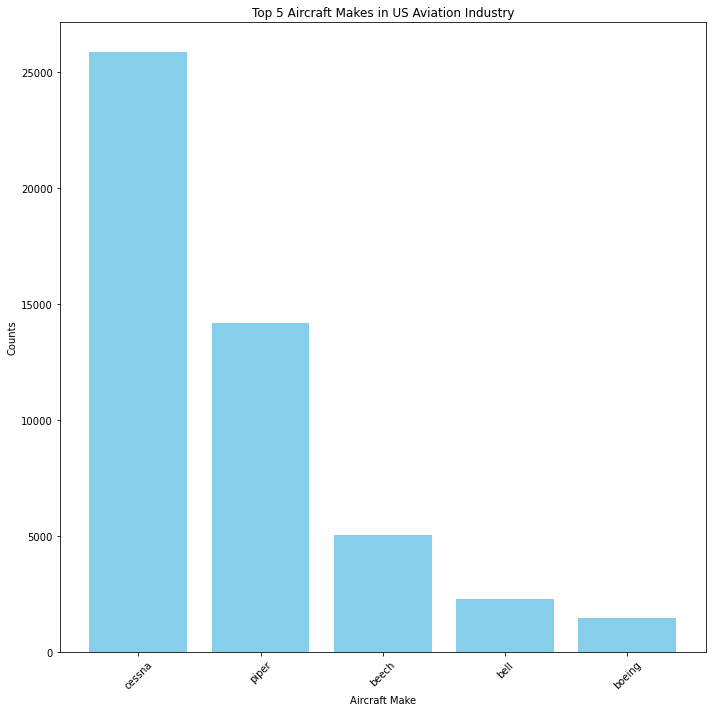

In [289]:
# plotting top_make counts
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(top_make_counts, make_counts, color='skyblue')
ax.set_title('Top 5 Aircraft Makes in US Aviation Industry')
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Counts')
plt.xticks(rotation=45)  # Rotate labels if they overlap
plt.tight_layout()
plt.show()

Cessna accounts for the largest number of accident records, followed by Piper and Beech. These three manufacturers 
are well-known for producing light general aviation aircraft, which are widely used for private flying, pilot training, 
and small-scale commercial operations. Their high representation likely reflects their large operational footprint in 
civilian aviation rather than disproportionately high accident rates.

Bell and Boeing, primarily known for helicopters and large commercial airliners respectively, appear less frequently. 
This distribution aligns with their more specialized roles and smaller share in general aviation activity compared to the 
light aircraft segment.

In [96]:
# Top Model counts 
top_model_counts= list(us_aviation_accidents_data['Model'].value_counts().head().index)
model_counts = list(us_aviation_accidents_data['Model'].value_counts().head())

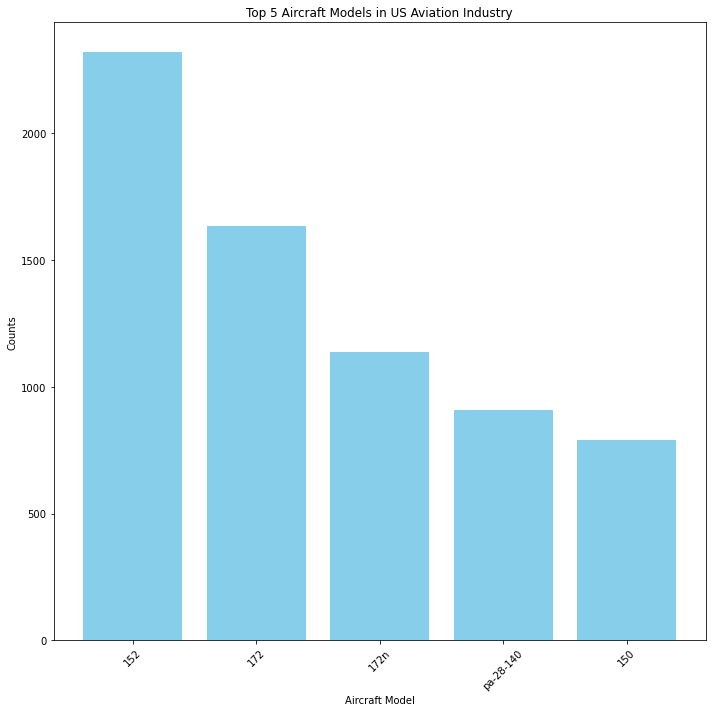

In [180]:
# plotting the top 5 model 
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(top_model_counts, model_counts, color='skyblue')
ax.set_title('Top 5 Aircraft Models in US Aviation Industry')
ax.set_xlabel('Aircraft Model')
ax.set_ylabel('Counts')
plt.xticks(rotation=45)  # Rotate labels if they overlap
plt.tight_layout()
plt.show()

Observation

Cessna 152, 172, 172n and 150 are among the most commonly used models in aviation. cessna 152 has highest number of 
accidents records in this dataset, followed by cessna 172, 172n and 150. pa-28-140(PA-28-140) is model from Piper 
make.

In [90]:
top_aircraft_category = list(us_aviation_accidents_data['Aircraft.Category'].value_counts().head().index)
top_aircraft_counts = list(us_aviation_accidents_data['Aircraft.Category'].value_counts().head())

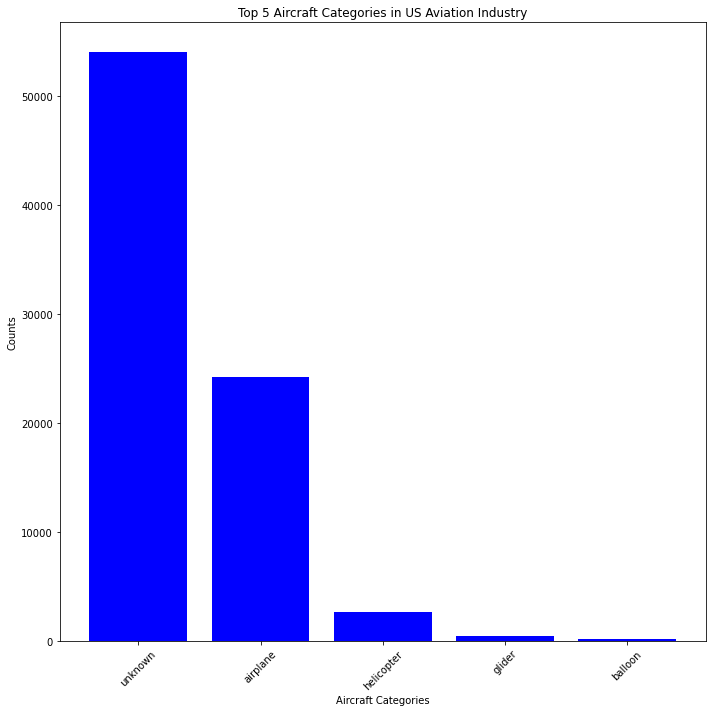

In [181]:
# plotting top aircraft categories used in Aviation
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(top_aircraft_category, top_aircraft_counts, color='blue')
ax.set_title('Top 5 Aircraft Categories in US Aviation Industry')
ax.set_xlabel('Aircraft Categories')
ax.set_ylabel('Counts')
plt.xticks(rotation=45)  # Rotate labels if they overlap
plt.tight_layout()
plt.show()

Observation

from the data above, The "Unknown" category accounts for the highest number of entries, suggesting a significant
proportion of records either lacked complete information or were not properly categorized during reporting. 
While this limits definitive conclusions, it underscores the importance of accurate data entry in aviation safety analysis.

Among the identifiable categories, airplanes dominate, which aligns with their widespread use in both commercial and
general aviation. Helicopters, gliders, and balloons appear less frequently, likely reflecting their lower operational 
volume.

These figures help prioritize safety investigations and policy considerations by focusing on the aircraft types most 
commonly involved in incidents

In [107]:
# purpose of flight counts in aviation accidents data
purpose_counts= aviation_cleaned_data['Purpose.of.flight'].value_counts().head()

In [109]:
purpose_counts

Personal              49448
Instructional         10601
Unknown                6802
Aerial Application     4712
Business               4018
Name: Purpose.of.flight, dtype: int64

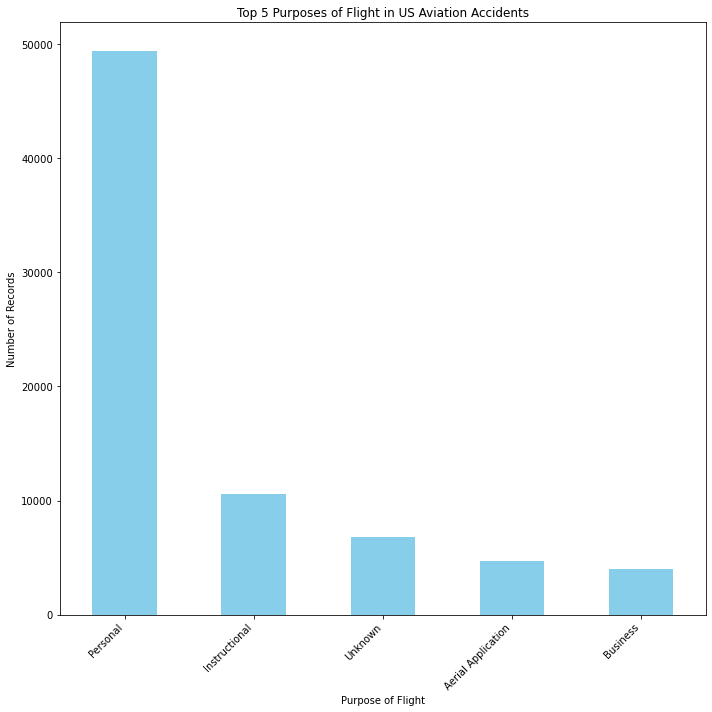

In [182]:
plt.figure(figsize=(10, 10))
purpose_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Purposes of Flight in US Aviation Accidents')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

observation

Personal category dominates in accidents records, accounting to nearly five times the second category. instructional
is flight training, represents the second largest group, this in most cases used in training new pilot students.
unknown suggests that flight purposes is not known while during data collection, which should be improved.
Aerial Application and business have less accidents records

In [ ]:
# correlation between accidents and aircraft category
accident_by_category= (us_aviation_accidents['Aircraft.Category'].value_counts().sort_values(ascending= False))


In [135]:
# selecting the top 10 common models used in aviation
top_make_model_combo= (us_aviation_accidents_data[['Make', 'Model']].value_counts().head(30).index)

In [140]:
filtered_aviation_data= us_aviation_accidents_data[us_aviation_accidents_data[['Make', 'Model']].apply(tuple, axis= 1).isin(top_make_model_combo)].copy()

In [141]:
filtered_aviation_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State
2,20061025x01555,accident,nyc07la005,1974-08-30,"saltville, va",united states,NaN,NaN,NaN,NaN,...,NaN,3.0,0.0,0.0,0.0,imc,cruise,probable cause,26-02-2007,VA
6,20001218x45446,accident,chi81la106,1981-08-01,"cotton, mn",united states,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,imc,unknown,probable cause,06-11-2001,MN
7,20020909x01562,accident,sea82da022,1982-01-01,"pullman, wa",united states,NaN,NaN,NaN,blackburn ag strip,...,NaN,0.0,0.0,0.0,2.0,vmc,takeoff,probable cause,01-01-1982,WA
10,20020909x01559,accident,ftw82da034,1982-01-01,"hobbs, nm",united states,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,1.0,vmc,approach,probable cause,01-01-1982,NM
17,20020917x01656,accident,anc82fag14,1982-01-02,"skwenta, ak",united states,NaN,NaN,NaN,NaN,...,NaN,3.0,0.0,0.0,0.0,vmc,unknown,probable cause,02-01-1983,AK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88832,20221207106431,accident,wpr23la060,2022-11-27,"willow spring, az",united states,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,unk,NaN,NaN,NaN,AZ
88857,20221213106447,accident,era23la086,2022-12-08,"covington, ga",united states,332754n,0835049w,NaN,NaN,...,NaN,0.0,0.0,0.0,2.0,vmc,NaN,NaN,28-12-2022,GA
88860,20221212106441,accident,wpr23la062,2022-12-10,"socorro, nm",united states,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,1.0,unk,NaN,NaN,12-12-2022,NM
88865,20221212106444,accident,era23la085,2022-12-12,"knoxville, tn",united states,355745n,0835218w,dkx,knoxville downtown island,...,knoxville flight training academy,0.0,0.0,0.0,1.0,vmc,NaN,NaN,15-12-2022,TN


In [290]:
# calculating total incidents and fatalities per make model
model_stats= filtered_aviation_data.groupby(["Make", "Model"]).agg({'Event.Id': 'count',
                                                       'Total.Fatal.Injuries':'sum',
                                                       'Total.Serious.Injuries': 'sum',
                                                       'Total.Minor.Injuries': 'sum',
                                                       'Total.Uninjured': 'sum',
                                                       })

In [291]:
# calculating total people involved
model_stats["Total People"]= (model_stats['Total.Fatal.Injuries'] + 
                             model_stats['Total.Serious.Injuries'] +
                             model_stats['Total.Minor.Injuries'] +
                             model_stats['Total.Uninjured'] )

In [292]:
# calculating safety metrics (risk factor)
model_stats['Fatality Rate']= model_stats['Total.Fatal.Injuries'] / model_stats['Total People']


In [293]:
model_stats['Injury Rates']= (model_stats['Total.Fatal.Injuries'] + model_stats['Total.Serious.Injuries'] + 
                              model_stats['Total.Minor.Injuries'])/ model_stats["Total People"]
                              

In [294]:
model_stats

Event.Id  Total.Fatal.Injuries  Total.Serious.Injuries  \
Make    Model                                                                
beech   a36              403                 295.0                   102.0   
bell    206b             458                 185.0                   139.0   
cessna  140              399                  43.0                    57.0   
        150              790                  93.0                   115.0   
        150l             451                 120.0                    85.0   
        150m             578                  99.0                    64.0   
        152             2322                 363.0                   195.0   
        170b             387                  59.0                    45.0   
        172             1634                 253.0                   290.0   
        172m             773                 221.0                   168.0   
        172n            1136                 390.0                   199.0   
        172p             680                 218.0                   113.0   
        172s             367                  73.0                    42.0   
        177              289                  87.0                    84.0   
        180              616                 101.0                    70.0   
        182              589                 126.0                   119.0   
        182p             347                 122.0                    65.0   
        a188b            307                  36.0                    40.0   
grumman g-164a           365                  18.0                    31.0   
piper   pa-12            323                  73.0                    33.0   
        pa-18            575                  86.0                    67.0   
        pa-18-150        571                 107.0                    81.0   
        pa-24-250        348                 171.0                    80.0   
        pa-28-140        910                 301.0                   258.0   
        pa-28-161        554                 211.0                   101.0   
        pa-28-180        567                 260.0                   167.0   
        pa-28-181        514                 344.0                   110.0   
        pa-28r-200       327                 171.0                    69.0   
        pa-32-300        339                 196.0                    99.0   
        pa-38-112        459                  86.0                    58.0   

                    Total.Minor.Injuries  Total.Uninjured  Total People  \
Make    Model                                                             
beech   a36                        109.0            460.0         966.0   
bell    206b                       184.0            552.0        1060.0   
cessna  140                         73.0            413.0         586.0   
        150                        200.0            746.0        1154.0   
        150l                       123.0            349.0         677.0   
        150m                       149.0            562.0         874.0   
        152                        417.0           2340.0        3315.0   
        170b                        61.0            566.0         731.0   
        172                        363.0           2202.0        3108.0   
        172m                       247.0           1068.0        1704.0   
        172n                       334.0           1336.0        2259.0   
        172p                       208.0            856.0        1395.0   
        172s                        38.0            419.0         572.0   
        177                        111.0            338.0         620.0   
        180                         73.0            987.0        1231.0   
        182                        158.0            813.0        1216.0   
        182p                       139.0            361.0         687.0   
        a188b                       45.0            195.0         316.0   
grumman g-164a         

In [295]:
# filtering model with minimum number of incidents
# model_stats.sort_values(by='Fatality Rate', ascending= False).index

In [296]:
# resetting columns
plot_df= model_stats.sort_values(by='Fatality Rate', ascending= False).reset_index()
# creating a combined label for plotting
plot_df['make_model'] = plot_df['Make'] + ' ' + plot_df['Model']

In [297]:
# make_model_stat_sorted

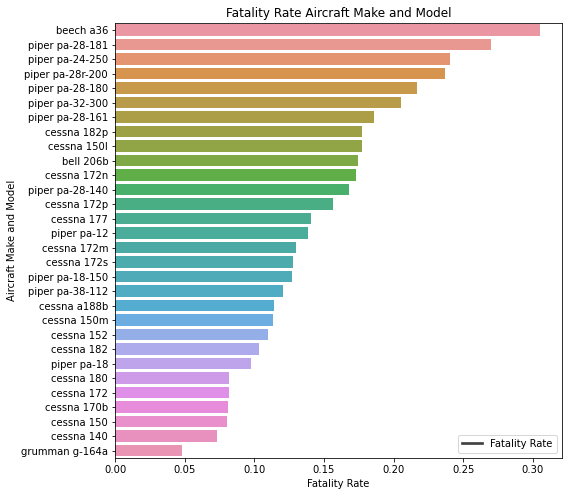

In [298]:
# plotting
plt.figure(figsize=(8, 8))
sns.barplot(x= 'Fatality Rate',
           y= 'make_model',
           data= plot_df)
plt.title("Fatality Rate Aircraft Make and Model")
plt.xlabel('Fatality Rate')
plt.ylabel('Aircraft Make and Model')
plt.legend(labels=['Fatality Rate'], loc='lower right')

plt.show()

observation

The first few bars are noticebly longer, that indicated they have slightly high fatality rates compared to the ones in
the bottom, the aircraft make and model that has less fatality rates here is Grumman G- 164A, with fatality rate of 0.05 
this indicated less fatality rates, and high chances of survivability. from this plot the safest make model is Grumman G-
164A, followed by Cessna 140, 150, and Cessna 170B.

In [299]:
# grouping by purpose of fight
purpose_stats = filtered_aviation_data.groupby("Purpose.of.flight").agg({'Event.Id': 'count',
                                                       'Total.Fatal.Injuries':'sum',
                                                       'Total.Serious.Injuries': 'sum',
                                                       'Total.Minor.Injuries': 'sum',
                                                       'Total.Uninjured': 'sum',
                                                       })

In [300]:
purpose_stats

,Event.Id,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Purpose.of.flight,,,,,
aerial application,659,55.0,75.0,100.0,445.0
aerial observation,192,85.0,57.0,78.0,147.0
air drop,1,0.0,0.0,0.0,2.0
air race show,2,0.0,2.0,0.0,2.0
asho,1,1.0,0.0,0.0,0.0
banner tow,24,5.0,7.0,0.0,13.0
business,625,271.0,127.0,154.0,607.0
executive/corporate,15,9.0,5.0,3.0,23.0
external load,5,0.0,4.0,4.0,2.0


In [301]:
# calculating total people
purpose_stats["Total People"]= (purpose_stats['Total.Fatal.Injuries'] + 
                             purpose_stats['Total.Serious.Injuries'] +
                             purpose_stats['Total.Minor.Injuries'] +
                             purpose_stats['Total.Uninjured'] )

In [302]:
# calculating fatality rate
purpose_stats['Fatality Rate']= purpose_stats['Total.Fatal.Injuries'] / purpose_stats['Total People']

In [303]:
# injury rate
purpose_stats['Injury Rates']= (purpose_stats['Total.Fatal.Injuries'] + purpose_stats['Total.Serious.Injuries'] + 
                              purpose_stats['Total.Minor.Injuries'])/ purpose_stats["Total People"]

In [304]:
purpose_stats.sort_values(by= 'Fatality Rate')

,Event.Id,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total People,Fatality Rate,Injury Rates
Purpose.of.flight,,,,,,,,
glider tow,3,0.0,0.0,1.0,3.0,4.0,0.000000,0.250000
pubs,1,0.0,0.0,0.0,2.0,2.0,0.000000,0.000000
air drop,1,0.0,0.0,0.0,2.0,2.0,0.000000,0.000000
air race show,2,0.0,2.0,0.0,2.0,4.0,0.000000,0.500000
public aircraft - local,5,0.0,5.0,0.0,6.0,11.0,0.000000,0.454545
flight test,16,0.0,3.0,2.0,20.0,25.0,0.000000,0.200000
external load,5,0.0,4.0,4.0,2.0,10.0,0.000000,0.800000
aerial application,659,55.0,75.0,100.0,445.0,675.0,0.081481,0.340741
instructional,4753,598.0,498.0,815.0,5326.0,7237.0,0.082631,0.264060


In [305]:
purpose_stats= purpose_stats.sort_values(by='Fatality Rate', ascending= False).reset_index()

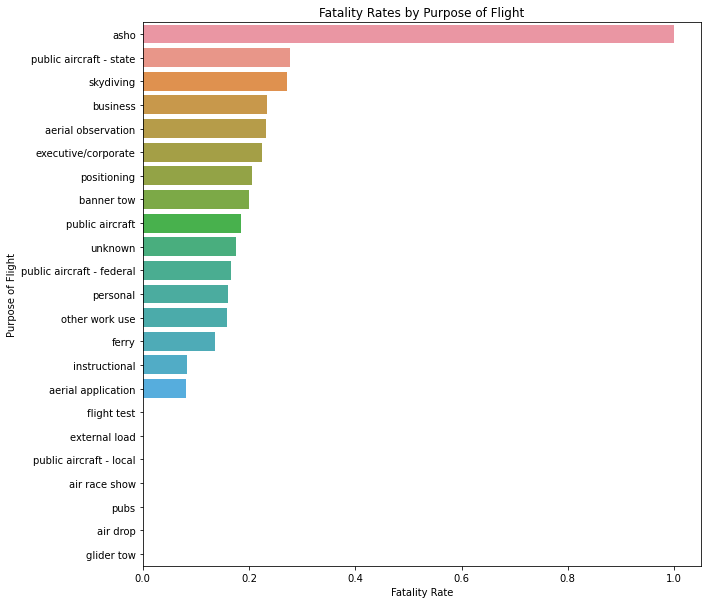

In [306]:
# plotting
plt.figure(figsize=(10, 10))
sns.barplot(x= 'Fatality Rate',
           y= 'Purpose.of.flight',
           data= purpose_stats)
plt.title('Fatality Rates by Purpose of Flight')
plt.xlabel('Fatality Rate')
plt.ylabel('Purpose of Flight')
plt.show()

plt.show()

Observation

Based on the above information the flight purpose at the top has high fatality rate. in this case its ASHO, ,moderate 
risk group include purposes like business, executive/corporate have fatal risk rate of about 30%, the purpose with the 
lowest risk is aerial application and instructional.

From this we can conclude that some flight purposes are consistently riskier like ASHO, and others like skydiving,
business, aerial observation and executive/corporate have moderate risks, its therefore recommendable to use realible 
aircraft type and skilled pilots.

A few purposes have no to low fatality risks

<AxesSubplot:xlabel='Total People', ylabel='Fatality Rate'>

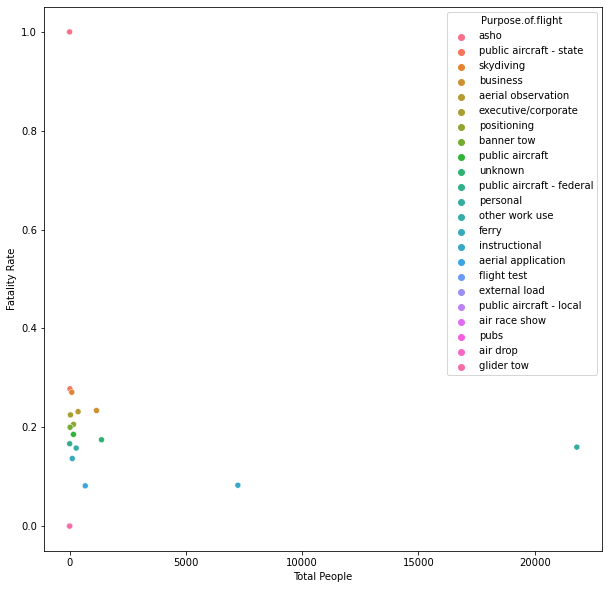

In [307]:
# scatter plot showing fatality rate per flight purpose
plt.figure(figsize=(10, 10))
sns.scatterplot(data= purpose_stats, x='Total People', y='Fatality Rate', hue= "Purpose.of.flight", alpha=1.0)

In [308]:
# analyzing risk by state
states_stats= us_aviation_accidents_data.groupby("State").agg({'Event.Id': 'count',
                                                       'Total.Fatal.Injuries':'sum',
                                                       'Total.Serious.Injuries': 'sum',
                                                       'Total.Minor.Injuries': 'sum',
                                                       'Total.Uninjured': 'sum',
                                                       }).rename(columns={'Event.Id': 'Incident Count'})

In [309]:
# calculating total people
states_stats["Total People"]= (states_stats['Total.Fatal.Injuries'] + 
                             states_stats['Total.Serious.Injuries'] +
                             states_stats['Total.Minor.Injuries'] +
                             states_stats['Total.Uninjured'] )

In [310]:
# calculating risk factor per state
states_stats['Fatality Rate']= states_stats['Total.Fatal.Injuries'] / states_stats['Total People']

In [315]:
states_stats= states_stats= states_stats.sort_values(by='Fatality Rate', ascending= False).reset_index()

In [326]:
top_states = states_stats[states_stats['Incident Count'] >= 5].head(15)

In [317]:
top_states

,index,State,Incident Count,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total People,Fatality Rate
1,1,GU,8,233.0,26.0,7.0,456.0,722.0,0.322715
2,2,AL,1153,475.0,239.0,259.0,1657.0,2630.0,0.180608
3,3,OK,1240,494.0,300.0,337.0,1748.0,2879.0,0.171587
4,4,GM,44,21.0,12.0,22.0,69.0,124.0,0.169355
5,5,DE,114,43.0,22.0,35.0,170.0,270.0,0.159259
6,6,MS,813,248.0,148.0,213.0,1005.0,1614.0,0.153656
7,7,MT,1050,363.0,186.0,215.0,1729.0,2493.0,0.145608
8,8,AR,1519,470.0,324.0,398.0,2043.0,3235.0,0.145286
9,9,ID,1436,468.0,289.0,299.0,2232.0,3288.0,0.142336
10,10,VT,241,89.0,64.0,66.0,461.0,680.0,0.130882


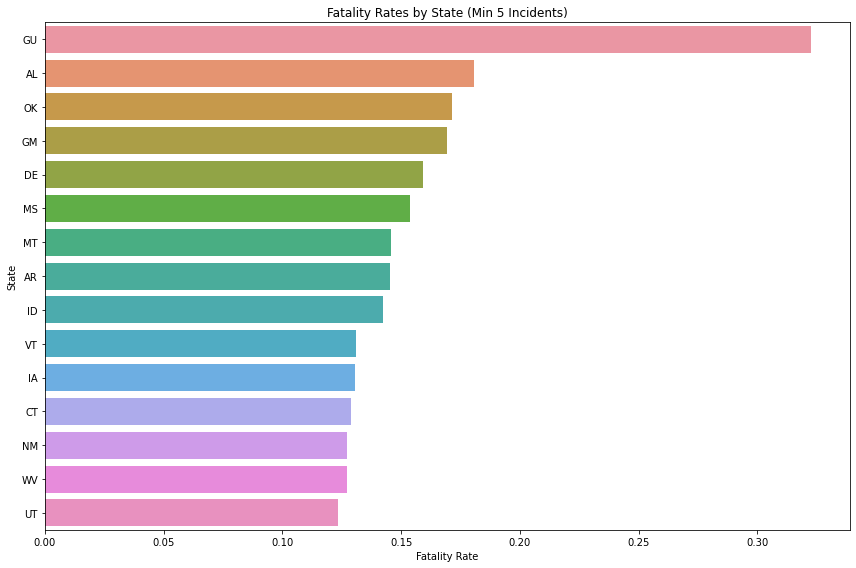

In [335]:
# plotting
plt.figure(figsize=(12, 8))
sns.barplot(x= "Fatality Rate", y= 'State', data= top_states)

plt.title('Fatality Rates by State (Min 5 Incidents)')
plt.xlabel('Fatality Rate')
plt.ylabel('State')
plt.tight_layout()
palette= "Reds r"



The top states has higher fatality rate then the rest. Guam Is a USA state territory and its leading in fatality rates.

The middle states like Arizona have moderate fatality rates as compared to the ones at the top.
Utah has the lowest fatality risk of 10% which makes it ideal for both aviation operations.

In [328]:
us_code_data= pd.read_csv("data/USState_Codes.csv", encoding= "latin1")

In [333]:
us_aviation_accidents_data = us_aviation_accidents_data.merge(us_code_data, how='left', 
                                                              left_on='State',       # column in aviation data
                                                              right_on='Abbreviation'  # column in state code data
)

In [334]:
us_aviation_accidents_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State,US_State,Abbreviation
0,20001218x45444,accident,sea87la080,1948-10-24,"moose creek, id",united states,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,unk,cruise,probable cause,NaN,ID,Idaho,ID
1,20001218x45447,accident,lax94la336,1962-07-19,"bridgeport, ca",united states,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,unk,unknown,probable cause,19-09-1996,CA,California,CA
2,20061025x01555,accident,nyc07la005,1974-08-30,"saltville, va",united states,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,imc,cruise,probable cause,26-02-2007,VA,Virginia,VA
3,20001218x45448,accident,lax96la321,1977-06-19,"eureka, ca",united states,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,imc,cruise,probable cause,12-09-2000,CA,California,CA
4,20041105x01764,accident,chi79fa064,1979-08-02,"canton, oh",united states,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,vmc,approach,probable cause,16-04-1980,OH,Ohio,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82232,20221227106491,accident,era23la093,2022-12-26,"annapolis, md",united states,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,unk,NaN,NaN,29-12-2022,MD,Maryland,MD
82233,20221227106494,accident,era23la095,2022-12-26,"hampton, nh",united states,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,unk,NaN,NaN,NaN,NH,New Hampshire,NH
82234,20221227106497,accident,wpr23la075,2022-12-26,"payson, az",united states,341525n,1112021w,pan,payson,...,0.0,0.0,1.0,vmc,NaN,NaN,27-12-2022,AZ,Arizona,AZ
82235,20221227106498,accident,wpr23la076,2022-12-26,"morgan, ut",united states,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,unk,NaN,NaN,NaN,UT,Utah,UT
